# Define the agents

In [1]:
import random
import math
from numpy.core.shape_base import atleast_2d
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

from os import statvfs_result
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch



In [2]:
# Import functions in the function file

%run trade_functions.ipynb


## Define Economy A

## trade function

# Trade

In [3]:
# define the condition to switch state in carnot cycle
def check_state1(list1, list2, t1s,t2s,state,g11, g22):
    sum_g = sum(list1)
    sum_m = sum(list2)
    T = (sum_m)/200
    #print('Key',t1s,T,abs(t1s-T))

    new_state = state

    if state == 1:
        if  T-t1s>0:
            new_state = 2
        else:
            new_state = 1
    elif state == 2:
        if  sum_g>g11 :
            new_state = 3
        else:
          new_state=2
    elif state == 3:
        if T- t2s<0:
            new_state = 4
        else:
          new_state=3

    elif state == 4:
        if  sum_g<g22 :
            new_state = 1
        else:
          new_state=4

    return new_state

In [4]:
# define the condition to switch state in  reverse carnot cycle
def check_state2(list1, list2, t1s,t2s,state,g11, g22):
    sum_g = sum(list1)
    sum_m = sum(list2)
    T = (sum_m)/200
    #print('Key',t1s,T,abs(t1s-T))

    new_state = state

    if state == 1:
        if  T-t1s>0:
            new_state = 2
        else:
            new_state = 1
    elif state == 2:
        if  sum_g<g11 :
            new_state = 3
        else:
          new_state=2
    elif state == 3:
        if T- t2s<0:
            new_state = 4
        else:
          new_state=3

    elif state == 4:
        if  sum_g>g22 :
            new_state = 1
        else:
          new_state=4

    return new_state

In [5]:
#  divide states to make figure 
def split_state(G_list,M_list,S_list):
  G1=G_list

  T1 = [M_list[i] /200 for i in range(len(G1))]




  entropy = [200 * (math.log(G1[i])+math.log(T1[i])) for i in range(len(G1))]
  price = [T1[i] / G1[i] for i in range(len(G1))]
  if 2 in S_list:
      first_position = S_list.index(2)
      print(f"The first occurrence of 2 is at index {first_position}")
  else:
      print("2 is not in the list")
  # Initialize empty lists for each state
  G1_1, G1_2, G1_3, G1_4,G1_5 = [], [], [], [],[]
  T1_1, T1_2, T1_3, T1_4,T1_5 = [], [], [], [],[]
  E1,E2,E3,E4,E5=[],[],[],[],[]
  P1,P2,P3,P4,P5=[],[],[],[],[]
  # Divide items based on states
  for i, state in enumerate(S_list):
      if state == 1 and i <first_position:
          G1_1.append(G1[i])
          T1_1.append(T1[i])
          E1.append(entropy[i])
          P1.append(price[i])
      elif state == 2:
          G1_2.append(G1[i])
          T1_2.append(T1[i])
          E2.append(entropy[i])
          P2.append(price[i])
      elif state == 3:
          G1_3.append(G1[i])
          T1_3.append(T1[i])
          E3.append(entropy[i])
          P3.append(price[i])
      elif state == 4:
          G1_4.append(G1[i])
          T1_4.append(T1[i])
          E4.append(entropy[i])
          P4.append(price[i])
      elif state==1 and i >first_position:
          G1_5.append(G1[i])
          T1_5.append(T1[i])
          E5.append(entropy[i])
          P5.append(price[i])



  # sorted_data = sorted(zip(G1_1, T1_1,E1,P1), key=lambda x: x[0])
  # G1_1_sorted, T1_1_sorted,E1_sorted,P1_sorted = zip(*sorted_data)
  # Plot T on G with different colors using plt.plot



  #m41.append(T1_5[0])



  #g41.append(G1_5[0])
  return G1_1, T1_1,G1_2,T1_2,G1_3,T1_3,G1_4,T1_4

In [6]:
# function for carnot cycle. Controll the trade between ship eocnomy and trader ; ship economy and Hot/cold economy in 4 states
def carnot_cycle(agent1,agent2,agent3,t1s,t2s,g11,g22,size_list,t,f1,f2,type_t,type_c,type_s):
  # type 0 is to simulate a infinte large economy where Cold/hot economy's temperature will not change
  if type_t==1:
      inter_tradef=inter_trade
      end_state=1
  elif type_t==0:
      inter_tradef=test_trade
      end_state=2
  num_agent=100

  state=1
  Gl=[]
  Ml=[]
  count=0
  S=[]
  Gap_list=[0,0,0,0]
  Gap_list2=[0,0]
  size,size2,size3=size_list[0],size_list[1],size_list[2]
  mla=agent1['money'].copy()
  gala=agent1['gooda'].copy()
  gbla=agent1['goodb'].copy()
  parametera=agent1['parameter'].copy()

  mlb=agent2['money'].copy()
  galb=agent2['gooda'].copy()
  gblb=agent2['goodb'].copy()
  parameterb=agent2['parameter'].copy()

  mlc=agent3['money'].copy()
  galc=agent3['gooda'].copy()
  gblc=agent3['goodb'].copy()
  parameterc=agent3['parameter'].copy()
  sum_etaa = sum(sublist[2] for sublist in parametera)
  sum_etab= sum(sublist[2] for sublist in parameterb)
  sum_etac= sum(sublist[2] for sublist in parameterc)
  sum_alphac=sum(sublist[0] for sublist in parameterc)
  Ta_history=[]
  Tb_history=[]
  for j in range(50000):
    #print(j,sum(galc),sum(mlc),state)

    if state==4:
      count=count+1
    if count!=0 and state==end_state:
        if type_t==1:
            return gala,galb,galc,mla,mlb,mlc,Gl,Ml,S,Gap_list
        elif type_t==0:
            return gala,galb,galc,mla,mlb,mlc,Gl,Ml,S,Gap_list2
   
    price=(sum(mlc)*sum_alphac)/(sum(galc)*sum_etac)



  




    if state==1 :

      miu=(1+0.03*type_c[0])*price
      for k in range(1000):
          galc,gblc,mlc=intra_trade(galc,gblc,mlc,parameterc,matrix,1,f1,f2)
       
          temp_mc=sum(mlc)
          galc,gblc,mlc=trade_atprice(galc,gblc,mlc,parameterc,economy_size,size,t,f1,miu)
          Gap_list[state-1]=Gap_list[state-1]+temp_mc-sum(mlc)
          # Use copy here because we want to get the change in M to calculate total amount of M change
          
       

          Gl.append(sum(galc))
          Ml.append(sum(mlc))

          S.append(1)



    elif state==2 :
      

      miu=(1+0.03*type_c[1])*price
      


      

      for k in range(10000):


        gala,gbla,mla=intra_trade(gala,gbla,mla,parametera,matrix2,1,f1,f2)
     
        
        galc,gblc,mlc=intra_trade(galc,gblc,mlc,parameterc,matrix,1,f1,f2)
     

        if k%size3==0:
            temp_mc=sum(mlc)
            galc,gblc,mlc=trade_atprice(galc,gblc,mlc,parameterc,economy_size,size*size2,t,f1,miu)
            Gap_list[state-1]=Gap_list[state-1]+temp_mc-sum(mlc)



        temp_mc=sum(mlc)
        gala,gbla,mla,galc,gblc,mlc=inter_tradef(gala,gbla,mla,galc,gblc,mlc,parametera,parameterc,matrix,size,[0,0,1],f1,f2)
        
        Gap_list2[0]=Gap_list2[0]-temp_mc+sum(mlc)
        
   
        



        Gl.append(sum(galc))
        Ml.append(sum(mlc))
        S.append(2)






    elif state==3:


      miu=(1+0.03*type_c[2])*price

      for k in range(1000):

        galc,gblc,mlc=intra_trade(galc,gblc,mlc,parameterc,matrix,1,f1,f2)
    
      
        
        temp_mc=sum(mlc)
        galc,gblc,mlc=trade_atprice(galc,gblc,mlc,parameterc,economy_size,size,t,f1,miu)
        Gap_list[state-1]=Gap_list[state-1]+temp_mc-sum(mlc)
   

        Gl.append(sum(galc))
        Ml.append(sum(mlc))
        S.append(3)



    elif state==4:
    



      miu=(1+0.03*type_c[3])*price
      for k in range(10000):


        galb,gblb,mlb=intra_trade(galb,gblb,mlb,parameterb,matrix2,1,f1,f2)

        
        galc,gblc,mlc=intra_trade(galc,gblc,mlc,parameterc,matrix,1,f1,f2)
   

        if k%size3==0:
            temp_mc=sum(mlc)
            galc,gblc,mlc=trade_atprice(galc,gblc,mlc,parameterc,economy_size,size*size2,t,f1,miu)
            Gap_list[state-1]=Gap_list[state-1]+temp_mc-sum(mlc)




        temp_mc=sum(mlc)
        galb,gblb,mlb,galc,gblc,mlc=inter_tradef(galb,gblb,mlb,galc,gblc,mlc,parametera,parameterc,matrix,size,[0,0,1],f1,f2)
        
        Gap_list2[1]=Gap_list2[1]-temp_mc+sum(mlc)



        Gl.append(sum(galc))
        Ml.append(sum(mlc))
        S.append(4)


    
    temp_state=type_s(galc, mlc, t1s,t2s, state,g11,g22)
    state=temp_state
    
  return gala,galb,galc,mla,mlb,mlc,Gl,Ml,S,Gap_list
  



## Carnot cycle


In [7]:
economy_size=100


# Create a 100x100 matrix filled with 1s
matrix = np.ones((economy_size, economy_size))

# And  Set the diagonal elements to 0
np.fill_diagonal(matrix, 0)
economy_size2=100


# Create a 100x100 matrix filled with 1s
matrix2 = np.ones((economy_size2, economy_size2))

# And  Set the diagonal elements to 0
np.fill_diagonal(matrix, 0)

In [8]:
agent_a = create_agent()
agent_a['id_list'] = [i for i in range(economy_size2)]
agent_a['parameter']=[[2,2,2] for _ in range(economy_size2)]
agent_a['money']=[52 for _ in range(economy_size2)]
agent_a['gooda']=[52 for _ in range(economy_size2)]
agent_a['goodb']=[52 for _ in range(economy_size2)]


In [9]:
agent_b = create_agent()
agent_b['id_list'] = [i for i in range(economy_size2)]
agent_b['parameter']=[[2,2,2] for _ in range(economy_size2)]
agent_b['money']=[40 for _ in range(economy_size2)]
agent_b['gooda']=[40 for _ in range(economy_size2)]
agent_b['goodb']=[40 for _ in range(economy_size2)]


In [10]:
agent_c = create_agent()
agent_c['id_list'] = [i for i in range(economy_size)]
agent_c['parameter']=[[2,2,2] for _ in range(economy_size)]
agent_c['money']=[40 for _ in range(economy_size)]
agent_c['gooda']=[40 for _ in range(economy_size)]
agent_c['goodb']=[40 for _ in range(economy_size)]


In [12]:
ga,gb,gc,ma,mb,mc,Gl,Ml,S,Gap_list=carnot_cycle(agent_a,agent_b,agent_c,26,20,6000,4000,[0.03,1,100],[1,0],utility_func_cd,utility_func_cd,0,[1,-1,-1,1],check_state1)

In [34]:
print(Gap_list,Gap_list[0]+Gap_list[1],1+(Gap_list[1]/Gap_list[0]))


[3334.8550502236794, -2778.97900795904] 555.8760422646396 0.1666867176812843


In [35]:
print(sum(mc))

5251.601613275638


The first occurrence of 2 is at index 65000


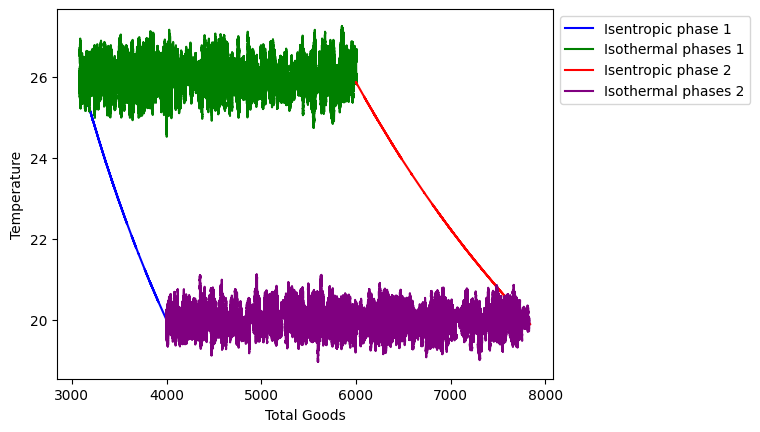

In [36]:


G1_1,T1_1,G1_2,T1_2,G1_3,T1_3,G1_4,T1_4=split_state(Gl,Ml,S)


# plt.plot(G1_2, T1_2, label='State 2', color='green')
plt.plot(G1_1, T1_1, label='Isentropic phase 1', color='blue')
plt.plot(G1_2, T1_2, label='Isothermal phases 1', color='green')
plt.plot(G1_3, T1_3, label='Isentropic phase 2', color='red')
plt.plot(G1_4, T1_4, label='Isothermal phases 2', color='purple')


# Add labels and legend
plt.xlabel('Total Goods')
plt.ylabel('Temperature')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

## Test effacacy

In [20]:
xl=np.arange(0.01,0.05,0.005)
print(xl)

[0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045]


In [16]:
pl=[1/3,-1/3,-1/3,1/3]
Gkl=[]
for  i in range(5):
    plist=[x*(2.5+0.5*i) for x in pl]
    Gml=[]
    k=10

    for j in range(k):
        ga,gb,gc,ma,mb,mc,Gl,Ml,S,Gap_list=carnot_cycle(agent_a,agent_b,agent_c,26,20,6000,4000,[0.03,0.3,1],[1,0],utility_func_cd,utility_func_cd,0,plist,check_state1)
        Gml.append(1+(Gap_list[1]/Gap_list[0])) 
        print(i,j,Gml)
    Gkl.append(np.mean(Gml))
    
    
    # print(Gap_list,Gap_list[0]+Gap_list[1],1+(Gap_list[1]/Gap_list[0]))

0 0 [0.1881043778233089]
0 1 [0.1881043778233089, 0.19672804776582908]
0 2 [0.1881043778233089, 0.19672804776582908, 0.21282748736649992]
0 3 [0.1881043778233089, 0.19672804776582908, 0.21282748736649992, 0.14435664529511305]
0 4 [0.1881043778233089, 0.19672804776582908, 0.21282748736649992, 0.14435664529511305, 0.18293732228147963]
0 5 [0.1881043778233089, 0.19672804776582908, 0.21282748736649992, 0.14435664529511305, 0.18293732228147963, 0.19362297964290198]
0 6 [0.1881043778233089, 0.19672804776582908, 0.21282748736649992, 0.14435664529511305, 0.18293732228147963, 0.19362297964290198, 0.19781855263865977]
0 7 [0.1881043778233089, 0.19672804776582908, 0.21282748736649992, 0.14435664529511305, 0.18293732228147963, 0.19362297964290198, 0.19781855263865977, 0.17664624519977823]
0 8 [0.1881043778233089, 0.19672804776582908, 0.21282748736649992, 0.14435664529511305, 0.18293732228147963, 0.19362297964290198, 0.19781855263865977, 0.17664624519977823, 0.19114181754621362]
0 9 [0.188104377823

In [19]:

#[0.21223187702910495, 0.20857319079624723, 0.19825562051846862, 0.18033480962408474, 0.15673146207708905, 0.15128473386340963, 0.15846230137274214, 0.13497085336605436, 0.12817899224656792, 0.11695335816862666]
Gkl2=[0.21223187702910495, 0.20857319079624723, 0.19825562051846862]
Gkl0=Gkl2+Gkl
print(Gkl,Gkl0)

[0.1884722150905021, 0.1737298344371638, 0.1630335382404694, 0.1451222145446755, 0.13108115102827692] [0.21223187702910495, 0.20857319079624723, 0.19825562051846862, 0.1884722150905021, 0.1737298344371638, 0.1630335382404694, 0.1451222145446755, 0.13108115102827692]


In [21]:
xl

array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045])

In [23]:
teff=[]
for i in range(8):
    temp=xl[i]
    
    eff=1-(1+temp)/(1.3*(1-temp))
    teff.append(eff)
    

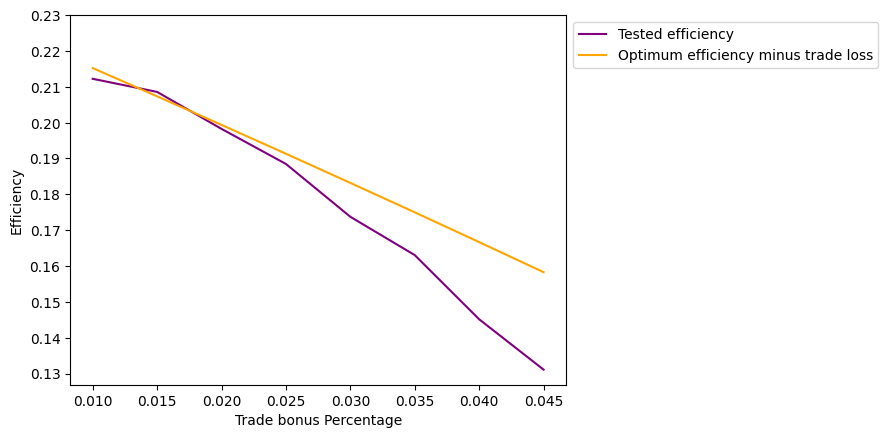

In [27]:
plt.plot(xl, Gkl0, label='Tested efficiency', color='purple')

plt.plot(xl, teff, label='Optimum efficiency minus trade loss', color='orange')
# Add labels and legend
plt.xlabel('Trade bonus Percentage')
plt.ylabel('Efficiency')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.yticks(np.arange(0.13, 0.24, 0.01))
# Show the plot
plt.show()

## Multicycle

In [17]:
economy_size=100
import numpy as np

# Create a 100x100 matrix filled with 1s
matrix = np.ones((economy_size, economy_size))

# And  Set the diagonal elements to 0
np.fill_diagonal(matrix, 0)
economy_size2=1000
import numpy as np

# Create a 100x100 matrix filled with 1s
matrix2 = np.ones((economy_size2, economy_size2))

# And  Set the diagonal elements to 0
np.fill_diagonal(matrix, 0)

In [18]:
agent_a = create_agent()
agent_a['id_list'] = [i for i in range(economy_size2)]
agent_a['parameter']=[[2,2,2] for _ in range(economy_size2)]
agent_a['money']=[52 for _ in range(economy_size2)]
agent_a['gooda']=[52 for _ in range(economy_size2)]
agent_a['goodb']=[52 for _ in range(economy_size2)]


In [19]:
agent_b = create_agent()
agent_b['id_list'] = [i for i in range(economy_size2)]
agent_b['parameter']=[[2,2,2] for _ in range(economy_size2)]
agent_b['money']=[40 for _ in range(economy_size2)]
agent_b['gooda']=[40 for _ in range(economy_size2)]
agent_b['goodb']=[40 for _ in range(economy_size2)]


In [20]:
agent_c = create_agent()
agent_c['id_list'] = [i for i in range(economy_size)]
agent_c['parameter']=[[2,2,2] for _ in range(economy_size)]
agent_c['money']=[40 for _ in range(economy_size)]
agent_c['gooda']=[40 for _ in range(economy_size)]
agent_c['goodb']=[40 for _ in range(economy_size)]


In [21]:
ga1,gb1,gc1,ma1,mb1,mc1,Gl1,Ml1,S1,Gap_list1=carnot_cycle(agent_a,agent_b,agent_c,26,20,6000,4000,[0.01,0.3,1],[1,0],utility_func_cd,utility_func_cd,1,[1,-1,-1,1],check_state1)

In [22]:
agent_a['money']=ma1
agent_a['gooda']=ga1
agent_b['money']=mb1
agent_b['gooda']=gb1
agent_c['money']=mc1
agent_c['gooda']=gc1
Tb=sum(mb1)/2000
Ta=sum(ma1)/2000

In [23]:
print(Ta,Tb)

24.52481707081387 21.219630703236085


In [24]:
ga2,gb2,gc2,ma2,mb2,mc2,Gl2,Ml2,S2,Gap_list2=carnot_cycle(agent_a,agent_b,agent_c,Ta,Tb,5800,4200,[0.01,0.3,1],[1,0],utility_func_cd,utility_func_cd,1,[1,-1,-1,1],check_state1)

In [25]:
agent_a['money']=ma2
agent_a['gooda']=ga2
agent_b['money']=mb2
agent_b['gooda']=gb2
agent_c['money']=mc2
agent_c['gooda']=gc2
Tb=sum(mb2)/2000
Ta=sum(ma2)/2000


In [26]:
print(Ta,Tb)

23.426539518988452 22.11066789983491


In [27]:
ga3,gb3,gc3,ma3,mb3,mc3,Gl3,Ml3,S3,Gap_list3=carnot_cycle(agent_a,agent_b,agent_c,Ta,Tb,5600,4400,[0.01,0.3,1],[1,0],utility_func_cd,utility_func_cd,1,[1,-1,-1,1],check_state1)

In [28]:
agent_a['money']=ma3
agent_a['gooda']=ga3
agent_b['money']=mb3
agent_b['gooda']=gb3
agent_c['money']=mc3
agent_c['gooda']=gc3
Tb=sum(mb3)/2000
Ta=sum(ma3)/2000

In [29]:
print(Ta,Tb)

22.79159288546384 22.549131036995195


In [30]:
G1_1,T1_1,G1_2,T1_2,G1_3,T1_3,G1_4,T1_4=split_state(Gl1,Ml1,S1)

The first occurrence of 2 is at index 187000


In [31]:
G1_1a,T1_1a,G1_2a,T1_2a,G1_3a,T1_3a,G1_4a,T1_4a=split_state(Gl2,Ml2,S2)

The first occurrence of 2 is at index 112000


In [32]:
G1_1b,T1_1b,G1_2b,T1_2b,G1_3b,T1_3b,G1_4b,T1_4b=split_state(Gl3,Ml3,S3)

The first occurrence of 2 is at index 37000


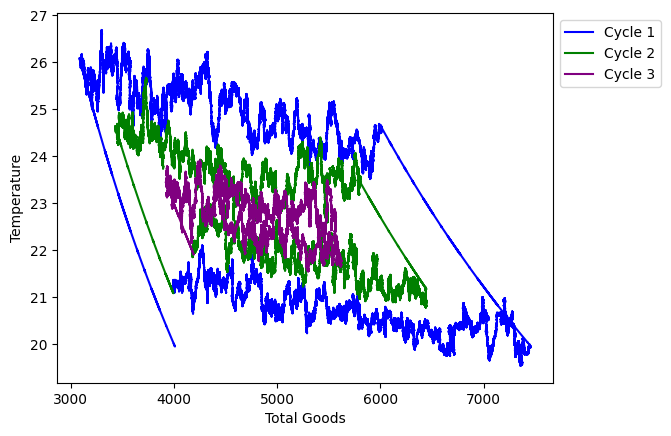

In [34]:
# plt.plot(G1_2, T1_2, label='State 2', color='green')
# plt.plot(G1_1, T1_1, label='Cycle 1', color='blue')
plt.plot(G1_2, T1_2,label='Cycle 1',  color='blue')
plt.plot(G1_3, T1_3,  color='blue')
plt.plot(G1_4, T1_4, color='blue')
plt.plot(G1_1, T1_1, color='blue')
# plt.plot(G1_1a, T1_1a, label='Cycle 2', color='green')
plt.plot(G1_2a, T1_2a, label='Cycle 2', color='green')
plt.plot(G1_3a, T1_3a,  color='green')
plt.plot(G1_4a, T1_4a,  color='green')
plt.plot(G1_1a, T1_1a, color='green')
# plt.plot(G1_1b, T1_1b, label='Cycle 3', color='purple')
plt.plot(G1_2b, T1_2b, label='Cycle 3', color='purple')
plt.plot(G1_3b, T1_3b,  color='purple')
plt.plot(G1_4b, T1_4b,  color='purple')
plt.plot(G1_1b, T1_1b,  color='purple')
# Add labels and legend
plt.xlabel('Total Goods')
plt.ylabel('Temperature')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))




# Add labels and legend
plt.xlabel('Total Goods')
plt.ylabel('Temperature')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

# Reverse Carnot Cycle


In [37]:
economy_size=100


# Create a 100x100 matrix filled with 1s
matrix = np.ones((economy_size, economy_size))

# And  Set the diagonal elements to 0
np.fill_diagonal(matrix, 0)
economy_size2=100


# Create a 100x100 matrix filled with 1s
matrix2 = np.ones((economy_size2, economy_size2))

# And  Set the diagonal elements to 0
np.fill_diagonal(matrix, 0)

In [38]:
agent_a = create_agent()
agent_a['id_list'] = [i for i in range(economy_size2)]
agent_a['parameter']=[[2,2,2] for _ in range(economy_size2)]
agent_a['money']=[52 for _ in range(economy_size2)]
agent_a['gooda']=[52 for _ in range(economy_size2)]
agent_a['goodb']=[52 for _ in range(economy_size2)]

In [39]:
agent_b = create_agent()
agent_b['id_list'] = [i for i in range(economy_size2)]
agent_b['parameter']=[[2,2,2] for _ in range(economy_size2)]
agent_b['money']=[40 for _ in range(economy_size2)]
agent_b['gooda']=[40 for _ in range(economy_size2)]
agent_b['goodb']=[40 for _ in range(economy_size2)]


In [40]:
agent_c = create_agent()
agent_c['id_list'] = [i for i in range(economy_size)]
agent_c['parameter']=[[2,2,2] for _ in range(economy_size)]
agent_c['money']=[40 for _ in range(economy_size)]
agent_c['gooda']=[40 for _ in range(economy_size)]
agent_c['goodb']=[40 for _ in range(economy_size)]


In [41]:
ga,gb,gc,ma,mb,mc,Gl,Ml,S,Gap_list=carnot_cycle(agent_a,agent_b,agent_c,26,20,2000,4000,[0.03,1,100],[1,0],utility_func_cd,utility_func_cd,0,[1,1,-1,-1],check_state2)

0 4000 4000 1
1 3972.052119473127 4028.7863169426796 1
2 3945.3126982884996 4056.7213070384432 1
3 3938.731619245679 4063.6912315505188 1
4 3915.84520063934 4088.01211655382 1
5 3905.5645305332127 4099.066774452931 1
6 3848.4371395613557 4160.8232908452765 1
7 3822.59836703979 4189.597538544862 1
8 3860.008068121052 4147.3661755257335 1
9 3828.12704277806 4182.648214404827 1
10 3819.0762246260206 4192.833895182472 1
11 3765.6669765382494 4253.229178047547 1
12 3725.7117554183083 4299.711481114099 1
13 3670.8637791371807 4364.908523579485 1
14 3613.012645539824 4435.761153633522 1
15 3594.3337801421426 4459.381506912961 1
16 3622.4300132985413 4423.47761341785 1
17 3609.4764342972867 4439.770229841299 1
18 3586.1276887602867 4469.351516557825 1
19 3561.1093614299134 4501.4669848755275 1
20 3564.4624263920987 4497.10134456957 1
21 3529.4318031961093 4542.62359481259 1
22 3519.434592356562 4555.876711865298 1
23 3477.797006606652 4611.393180021386 1
24 3450.5642671254177 4648.585774915468

In [42]:
print(Gap_list)
#[2314.6969088715928, -1624.9802813515194]

[-2231.1396681434535, 1565.099704994488]


The first occurrence of 2 is at index 58000


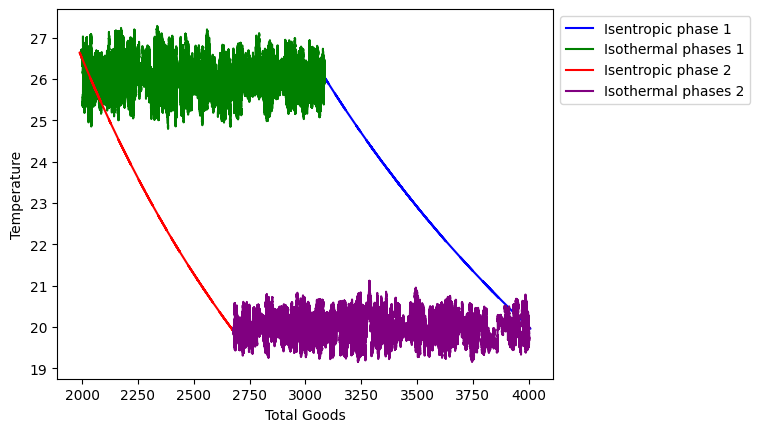

In [43]:
G1_1,T1_1,G1_2,T1_2,G1_3,T1_3,G1_4,T1_4=split_state(Gl,Ml,S)

import numpy as np
import matplotlib.pyplot as plt
# plt.plot(G1_2, T1_2, label='State 2', color='green')
plt.plot(G1_1, T1_1, label='Isentropic phase 1', color='blue')
plt.plot(G1_2, T1_2, label='Isothermal phases 1', color='green')
plt.plot(G1_3, T1_3, label='Isentropic phase 2', color='red')
plt.plot(G1_4, T1_4, label='Isothermal phases 2', color='purple')


# Add labels and legend
plt.xlabel('Total Goods')
plt.ylabel('Temperature')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

# Reverse Multi

In [36]:
economy_size=100


# Create a 100x100 matrix filled with 1s
matrix = np.ones((economy_size, economy_size))

# And  Set the diagonal elements to 0
np.fill_diagonal(matrix, 0)
economy_size2=500


# Create a 100x100 matrix filled with 1s
matrix2 = np.ones((economy_size2, economy_size2))

# And  Set the diagonal elements to 0
np.fill_diagonal(matrix, 0)

In [37]:
agent_a = create_agent()
agent_a['id_list'] = [i for i in range(economy_size2)]
agent_a['parameter']=[[2,2,2] for _ in range(economy_size2)]
agent_a['money']=[40 for _ in range(economy_size2)]
agent_a['gooda']=[40 for _ in range(economy_size2)]
agent_a['goodb']=[40 for _ in range(economy_size2)]


In [38]:
agent_b = create_agent()
agent_b['id_list'] = [i for i in range(economy_size2)]
agent_b['parameter']=[[2,2,2] for _ in range(economy_size2)]
agent_b['money']=[40 for _ in range(economy_size2)]
agent_b['gooda']=[40 for _ in range(economy_size2)]
agent_b['goodb']=[40 for _ in range(economy_size2)]

In [39]:
agent_c = create_agent()
agent_c['id_list'] = [i for i in range(economy_size)]
agent_c['parameter']=[[2,2,2] for _ in range(economy_size)]
agent_c['money']=[40 for _ in range(economy_size)]
agent_c['gooda']=[40 for _ in range(economy_size)]
agent_c['goodb']=[40 for _ in range(economy_size)]


In [40]:
ga1,gb1,gc1,ma1,mb1,mc1,Gl1,Ml1,S1,Gap_list1=carnot_cycle(agent_a,agent_b,agent_c,20,20,3000,4500,[0.01,0.3,1],[1,0],utility_func_cd,utility_func_cd,1,[1,1,-1,-1],check_state2)

In [41]:
agent_a['money']=ma1
agent_a['gooda']=ga1
agent_b['money']=mb1
agent_b['gooda']=gb1
agent_c['money']=mc1
agent_c['gooda']=gc1
Tb=sum(mb1)/1000
Ta=sum(ma1)/1000
print(Ta,Tb,sum(mc1))

20.925491934188667 19.057247983403826 3698.22562316523


In [42]:
ga2,gb2,gc2,ma2,mb2,mc2,Gl2,Ml2,S2,Gap_list2=carnot_cycle(agent_a,agent_b,agent_c,Ta,Tb,2800,4700,[0.01,0.3,1],[1,0],utility_func_cd,utility_func_cd,1,[1,1,-1,-1],check_state2)

In [43]:
agent_a['money']=ma2
agent_a['gooda']=ga2
agent_b['money']=mb2
agent_b['gooda']=gb2
agent_c['money']=mc2
agent_c['gooda']=gc2
Tb=sum(mb2)/1000
Ta=sum(ma2)/1000
print(Ta,Tb,sum(mc2))

22.205055026351012 18.093455657132523 3506.035879607075


In [44]:
ga3,gb3,gc3,ma3,mb3,mc3,Gl3,Ml3,S3,Gap_list3=carnot_cycle(agent_a,agent_b,agent_c,Ta,Tb,2600,4000,[0.01,0.3,1],[1,0],utility_func_cd,utility_func_cd,1,[1,1,-1,-1],check_state2)

In [45]:
Tb=sum(mb3)/1000
Ta=sum(ma3)/1000

print(Ta,Tb,sum(mc3))

23.625635196763174 17.70341024010298 3454.6851132126985


In [46]:
G1_1,T1_1,G1_2,T1_2,G1_3,T1_3,G1_4,T1_4=split_state(Gl1,Ml1,S1)

The first occurrence of 2 is at index 1000


In [47]:
G1_1a,T1_1a,G1_2a,T1_2a,G1_3a,T1_3a,G1_4a,T1_4a=split_state(Gl2,Ml2,S2)

The first occurrence of 2 is at index 79000


In [48]:
G1_1b,T1_1b,G1_2b,T1_2b,G1_3b,T1_3b,G1_4b,T1_4b=split_state(Gl3,Ml3,S3)

The first occurrence of 2 is at index 197000


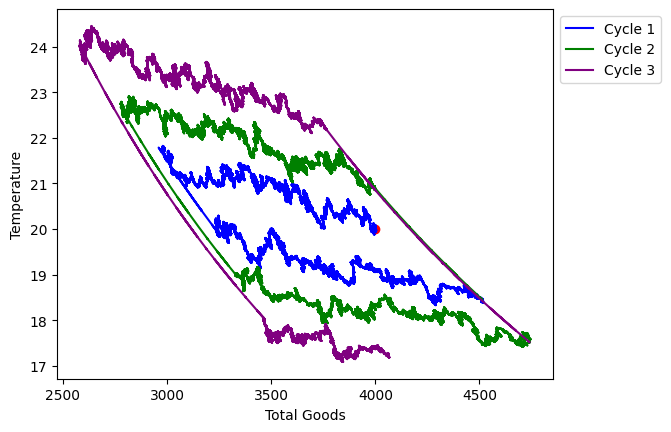

In [49]:
# plt.plot(G1_2, T1_2, label='State 2', color='green')
# plt.plot(G1_1, T1_1, label='Cycle 1', color='blue')
plt.plot(G1_2, T1_2,label='Cycle 1',  color='blue')
plt.plot(G1_3, T1_3,  color='blue')
plt.plot(G1_4, T1_4, color='blue')
plt.plot(G1_1, T1_1, color='blue')
# plt.plot(G1_1a, T1_1a, label='Cycle 2', color='green')
plt.plot(G1_2a, T1_2a, label='Cycle 2', color='green')
plt.plot(G1_3a, T1_3a,  color='green')
plt.plot(G1_4a, T1_4a,  color='green')
plt.plot(G1_1a, T1_1a, color='green')
# plt.plot(G1_1b, T1_1b, label='Cycle 3', color='purple')
plt.plot(G1_2b, T1_2b, label='Cycle 3', color='purple')
plt.plot(G1_3b, T1_3b,  color='purple')
plt.plot(G1_4b, T1_4b,  color='purple')
plt.plot(G1_1b, T1_1b,  color='purple')
# Add labels and legend
plt.xlabel('Total Goods')
plt.ylabel('Temperature')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


#plt.axhline(y=20, color='red', linestyle='--', label='Start Temperature for both Economy')
plt.scatter(x=4000, y=20, color='red') 
# Add labels and legend
plt.xlabel('Total Goods')
plt.ylabel('Temperature')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


In [50]:
# Trader spent money
print(sum(Gap_list1)+sum(Gap_list2)+sum(Gap_list3))

-783.7305500775765


## Net change of Trader

In [51]:
# Ship economy spend money
sum(mc3)-4000

-545.3148867873015

In [52]:
# Change on Hot and Cold economy
print(sum(ma3)-20000,sum(mb3)-20000,sum(ma3)+sum(mb3)-40000)

3625.6351967631745 -2296.5897598970223 1329.0454368661522
